# 打造CNN-測試調整filter的效果

## 1.前置作業

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


### 讀入基本套件

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 讀入資料

In [4]:
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 調整輸入形狀

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

### 調整輸出形狀

In [7]:
from keras.utils import np_utils

In [8]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### 標準化

In [9]:
x_train = x_train/255
x_test = x_test/255

## 2.打造CNN與測試

### 2-1決定架構-先使用老師上課教的版本(model_0)
- 做3次的 convolution + max-pooling(每次convolution完都接max-pooling)
- filter個數為 4, 8, 16，filter 大小 為 5 * 5
- max-pooling 大小為 2 * 2
- 最後送進標準神經網絡，1 層 9 個神經元

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1))) 
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(8, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

In [14]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [15]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
__________

In [17]:
model_0_10 = model.fit(x_train, y_train, batch_size = 100, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.0899 - acc: 0.1075
Epoch 2/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0895 - acc: 0.1860
Epoch 3/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.0890 - acc: 0.2054
Epoch 4/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.0875 - acc: 0.2367
Epoch 5/10
60000/60000 [==============================] - 25s 414us/step - loss: 0.0817 - acc: 0.2803
Epoch 6/10
60000/60000 [==============================] - 26s 433us/step - loss: 0.0712 - acc: 0.3912
Epoch 7/10
60000/60000 [==============================] - 28s 471us/step - loss: 0.0455 - acc: 0.7032
Epoch 8/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0264 - acc: 0.8243
Epoch 9/10
60000/60000 [==============================] - 25s 409us/step - loss: 0.0179 - acc: 0.8829
Epoch 10/10
60000/60000 [=========

In [18]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 253us/step


#### 2-1 model_0結果；正確率為0.91

In [19]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.01348
測試資料的正確率: 0.9101


### 2-2決定架構-將filter大小調大為10 * 10(model_1)
- 做3次的 convolution + max-pooling(每次convolution完都接max-pooling)
- filter個數為 4, 8, 16，filter 大小 為 <span style="color:red;">10 * 10</span>
- max-pooling 大小為 2 * 2
- 最後送進標準神經網絡，1 層 9 個神經元

In [20]:
model_1 = Sequential()

In [21]:
model_1.add(Conv2D(4, (10, 10), padding='same', input_shape=(28, 28, 1))) 
model_1.add(Activation('relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Conv2D(8, (10, 10), padding='same'))
model_1.add(Activation('relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Conv2D(16, (10, 10), padding='same'))
model_1.add(Activation('relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))

In [22]:
model_1.add(Flatten())
model_1.add(Dense(9))
model_1.add(Activation('relu'))

In [23]:
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [24]:
model_1.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [25]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 4)         404       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 8)         3208      
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          12816     
__________

In [26]:
model_1_10 = model_1.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0893 - acc: 0.1268
Epoch 2/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0830 - acc: 0.2969
Epoch 3/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0532 - acc: 0.6438
Epoch 4/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0288 - acc: 0.8107
Epoch 5/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0171 - acc: 0.8924
Epoch 6/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0128 - acc: 0.9193
Epoch 7/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0106 - acc: 0.9328
Epoch 8/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0092 - acc: 0.9423
Epoch 9/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0082 - acc: 0.9483
Epoch 10/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0075 - acc: 0.9518

#### 2-2 model_1 結果：正確率為0.96，調大filter有效(參數變多，跑的時間也變長)

In [27]:
score_1 = model_1.evaluate(x_test, y_test)
print(f'測試資料的 loss: {score_1[0]:.5f}')
print(f'測試資料的正確率: {score_1[1]}')

10000/10000 [==============================] - 6s 615us/step
測試資料的 loss: 0.00689
測試資料的正確率: 0.9569


### 2-3決定架構-將filter個數調多為8, 16, 32(model_2)
- 做3次的 convolution + max-pooling(每次convolution完都接max-pooling)
- filter個數為 <span style="color:red;">8, 16, 32</span>，filter 大小 為 5 * 5
- max-pooling 大小為 2 * 2
- 最後送進標準神經網絡，1 層 9 個神經元

In [28]:
model_2 = Sequential()

In [29]:
model_2.add(Conv2D(8, (5, 5), padding='same', input_shape=(28, 28, 1))) 
model_2.add(Activation('relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Conv2D(16, (5, 5), padding='same'))
model_2.add(Activation('relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Conv2D(32, (5, 5), padding='same'))
model_2.add(Activation('relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

In [30]:
model_2.add(Flatten())
model_2.add(Dense(9))
model_2.add(Activation('relu'))

In [31]:
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

In [32]:
model_2.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [34]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          12832     
__________

In [35]:
model_2_10 = model_2.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 38s 630us/step - loss: 0.0898 - acc: 0.1256
Epoch 2/10
60000/60000 [==============================] - 37s 620us/step - loss: 0.0892 - acc: 0.2258
Epoch 3/10
60000/60000 [==============================] - 39s 649us/step - loss: 0.0857 - acc: 0.3292
Epoch 4/10
60000/60000 [==============================] - 37s 623us/step - loss: 0.0569 - acc: 0.6330
Epoch 5/10
60000/60000 [==============================] - 37s 622us/step - loss: 0.0250 - acc: 0.8418
Epoch 6/10
60000/60000 [==============================] - 38s 633us/step - loss: 0.0157 - acc: 0.8999
Epoch 7/10
60000/60000 [==============================] - 38s 636us/step - loss: 0.0119 - acc: 0.9240
Epoch 8/10
60000/60000 [==============================] - 38s 634us/step - loss: 0.0100 - acc: 0.9365
Epoch 9/10
60000/60000 [==============================] - 38s 632us/step - loss: 0.0089 - acc: 0.9432
Epoch 10/10
60000/60000 [==============================] - 38s 637us/step - loss: 

#### 2-3 model_2 結果：正確率為0.95，調多filter有效(參數變多，跑的時間也變長)

In [36]:
score_2 = model_2.evaluate(x_test, y_test)
print(f'測試資料的 loss: {score_2[0]:.5f}')
print(f'測試資料的正確率: {score_2[1]}')

10000/10000 [==============================] - 3s 295us/step
測試資料的 loss: 0.00725
測試資料的正確率: 0.9527


## 3.結果討論

### 先做個圖看看

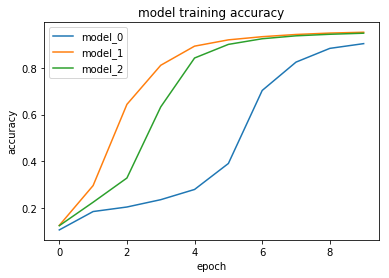

In [37]:
plt.plot(model_0_10.history["acc"])
plt.plot(model_1_10.history["acc"])
plt.plot(model_2_10.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['model_0', 'model_1', 'model_2'], loc = 'best')
plt.show()

### 結論：不管是調大filter，或是調多filter，都可以讓預測正確率提升，不過，兩者的效果似乎在伯仲之間，皆為0.95左右
#### 後記：之後有嘗試同時調大兩者，看正確率能不能更高，但kernel就直接死掉了QQ